In [1]:
import pandas as pd
import xml.etree.ElementTree as et
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine

In [2]:
engine = create_engine('sqlite:///db_proj.db')

In [3]:
def parse_Xml(xml_file, df_cols): 
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element. 
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    print(xroot)
    rows = []
    
    for node in xroot: 
        res = []
        #res.append(node.attrib.get(df_cols[0]))
        for el in df_cols[0:]: 
            if node is not None:
                #res.append(node.find(el).text)
                res.append(node.attrib.get(el))
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [4]:
df_cols = ["Id","Reputation","CreationDate","DisplayName","LastAccessDate","WebsiteUrl","Location","AboutMe","Views","UpVotes","DownVotes","AccountId","ProfileImageUrl"]
df_users = parse_Xml("Users.xml",df_cols)

<Element 'users' at 0x000001C58C6844F8>


In [5]:
df_users.to_sql('Users', engine, if_exists='append')

In [6]:
conn = sqlite3.connect('db_proj.db')

In [7]:
cols = ["Id","UserId","Name","Date","Class","TagBased"]
df_badges = parse_Xml("Badges.xml",cols)
df_badges.to_sql("Badges",engine,if_exists="append")

<Element 'badges' at 0x000001C595855228>


In [8]:
df_badges.to_sql("Badges",engine,if_exists = "append")

In [9]:
cols_df = ["Id","PostTypeId","CreationDate","Score","ViewCount","Body","OwnerUserId","LastActivityDate","Title","Tags","AnswerCount","CommentCount","FavouriteCount","CLosedDate","AcceptedAnswerId","LastEditorUserId","DisplayName","OwnerDisplayName"]
df_posts = parse_Xml("Posts.xml",cols_df)

<Element 'posts' at 0x000001C597CDE728>


In [10]:
df_posts.to_sql("Posts",engine,if_exists="append")

In [11]:
x = df_badges[(df_badges['Name']=="Tumbleweed") & (df_badges['UserId'])]
df = pd.DataFrame(x)
df

,Id,UserId,Name,Date,Class,TagBased
576,582,122,Tumbleweed,2014-06-07T14:38:45.793,3,False
1160,1175,84,Tumbleweed,2014-06-22T00:30:35.860,3,False
1647,2670,2511,Tumbleweed,2014-07-23T08:50:31.233,3,False
1797,2828,2785,Tumbleweed,2014-08-06T14:45:37.860,3,False
1881,2913,2433,Tumbleweed,2014-08-15T17:51:05.880,3,False
...,...,...,...,...,...,...
73099,82002,56947,Tumbleweed,2019-06-17T16:55:03.053,3,False
73108,82011,38556,Tumbleweed,2019-06-17T18:30:02.617,3,False
73109,82012,56753,Tumbleweed,2019-06-17T18:30:02.617,3,False
73115,82018,75782,Tumbleweed,2019-06-17T21:45:05.263,3,False


In [12]:
y = pd.merge(df_posts, df, left_on = 'OwnerUserId',  right_on = 'UserId', how='left', indicator=True)

In [13]:
df1 = pd.DataFrame(y)

In [14]:
b = df1[(df1['Name']=="Tumbleweed")] 
df_ = pd.DataFrame(b)
df_.head()

,Id_x,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,...,LastEditorUserId,DisplayName,OwnerDisplayName,Id_y,UserId,Name,Date,Class,TagBased,_merge
9,19,1,2014-05-14T03:56:20.963,87,12620,<p>Lots of people use the term <em>big data</e...,84,2018-05-01T13:04:43.563,How big is big data?,<bigdata><scalability><efficiency><performance>,...,10119,None,None,1175,84,Tumbleweed,2014-06-22T00:30:35.860,3,False,both
12,22,1,2014-05-14T05:58:21.927,131,153456,<p>My data set contains a number of numeric at...,97,2019-08-26T06:53:11.247,K-Means clustering for mixed numeric and categ...,<data-mining><clustering><octave><k-means><cat...,...,97,None,None,5274,97,Tumbleweed,2014-11-25T10:08:56.280,3,False,both
13,23,2,2014-05-14T06:06:13.603,8,None,<p>Data Science specialization from Johns Hopk...,97,2014-05-14T06:06:13.603,None,None,...,None,None,None,5274,97,Tumbleweed,2014-11-25T10:08:56.280,3,False,both
20,30,2,2014-05-14T08:03:28.117,21,None,<p>Total amount of data in the world: 2.8 zeta...,26,2014-05-14T18:30:59.180,None,None,...,26,None,None,66275,26,Tumbleweed,2018-12-12T07:25:14.267,3,False,both
23,35,1,2014-05-14T09:51:54.753,19,377,"<p>In working on exploratory data analysis, an...",26,2014-05-20T03:56:43.147,How to scale up algorithm development?,<algorithms>,...,None,None,None,66275,26,Tumbleweed,2018-12-12T07:25:14.267,3,False,both


In [15]:

import matplotlib.pyplot as plt

Text(0.5, 0, 'Uers with tumbleweed badge')

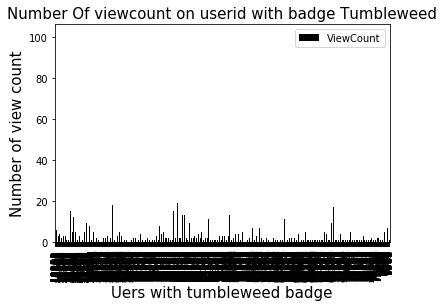

In [25]:
ch = pd.pivot_table(df_, index='UserId', values='ViewCount', aggfunc='count', dropna=True)
ch.plot(kind="bar", color=tuple(["black"]))
plt.title('Number Of viewcount on userid with badge Tumbleweed' ,fontsize = 15)
plt.ylabel('Number of view count', fontsize = 15)
plt.xlabel('Uers with tumbleweed badge', fontsize = 15)

Text(0.5, 0, 'Uers with tumbleweed badge')

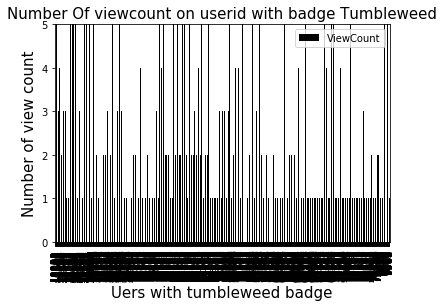

In [26]:
ch1 = pd.pivot_table(df_, index='UserId', values='ViewCount', aggfunc='count', dropna=True)
ch1.plot(kind="bar", color=tuple(["black"]))
plt.ylim(0, 5)
plt.title('Number Of viewcount on userid with badge Tumbleweed' ,fontsize = 15)
plt.ylabel('Number of view count', fontsize = 15)
plt.xlabel('Uers with tumbleweed badge', fontsize = 15)

In [18]:
z = pd.merge(df_users, df, left_on = 'Id',  right_on = 'UserId', how='left', indicator=True)
dd = pd.DataFrame(z)
c = dd[(dd['Name']=="Tumbleweed")] 
df_f = pd.DataFrame(c)
df_f

,Id_x,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl,Id_y,UserId,Name,Date,Class,TagBased,_merge
25,26,2342,2014-05-13T23:41:54.430,Alex I,2019-07-11T21:30:37.137,None,None,None,98,55,3,2048845,https://i.stack.imgur.com/S6fiE.png?s=128&g=1,66275,26,Tumbleweed,2018-12-12T07:25:14.267,3,False,both
74,77,86,2014-05-14T02:31:42.773,Srikar Appalaraju,2019-08-03T07:47:59.160,http://srikar.wordpress.com,None,"<p>Hi I am Srikar, I think I have been program...",13,53,0,49383,https://i.stack.imgur.com/wY0k3.jpg,26601,77,Tumbleweed,2017-01-21T16:21:42.533,3,False,both
79,82,464,2014-05-14T03:16:48.710,Damian Melniczuk,2019-08-16T10:20:16.143,http://data.melniczuk.eu/,"Wroclaw, Poland","<p>Physics student, Ubuntu user, games fan.</p>\n",16,135,0,514829,None,10179,82,Tumbleweed,2015-06-05T10:26:43.857,3,False,both
81,84,2697,2014-05-14T03:30:28.107,Rubens,2019-07-25T06:29:39.287,http://dcc.ufmg.br/~rubens,Minas Gerais,<p>#SOreadytohelp</p>\n\n<p>I'm a computer sci...,230,373,2,1822136,None,1175,84,Tumbleweed,2014-06-22T00:30:35.860,3,False,both
93,97,2718,2014-05-14T05:32:45.010,IharS,2019-08-26T07:20:28.960,https://www.linkedin.com/in/shyroki,"Minsk, Belarus","<p>Data analytics team lead, currently working...",174,309,12,241216,https://www.gravatar.com/avatar/68acdc33e278ab...,5274,97,Tumbleweed,2014-11-25T10:08:56.280,3,False,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62195,75690,1,2019-06-08T20:02:14.407,Justeton,2019-06-09T10:16:10.657,None,None,None,0,0,0,9178803,https://www.gravatar.com/avatar/d6675575248181...,81893,75690,Tumbleweed,2019-06-15T20:10:20.413,3,False,both
62221,75716,1,2019-06-09T15:15:32.020,CovertKoala,2019-06-17T14:11:55.630,None,"California, USA",None,0,0,0,16101184,https://www.gravatar.com/avatar/02b238e0f710ff...,81930,75716,Tumbleweed,2019-06-16T15:35:26.803,3,False,both
62266,75761,1,2019-06-10T14:54:55.917,Tom Z,2019-07-26T18:32:52.157,None,None,None,1,0,0,16107144,https://lh3.googleusercontent.com/-xjObjuEfulU...,81998,75761,Tumbleweed,2019-06-17T15:15:06.077,3,False,both
62270,75765,1,2019-06-10T15:16:55.917,Neugi,2019-06-14T07:18:25.763,http://ncode.at,None,None,0,0,0,924014,https://www.gravatar.com/avatar/33624fb5062177...,82000,75765,Tumbleweed,2019-06-17T16:20:12.603,3,False,both


Text(0.5, 0, 'Uers with tumbleweed badge')

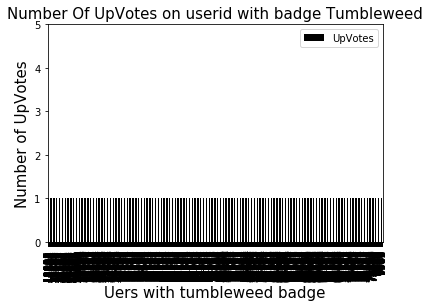

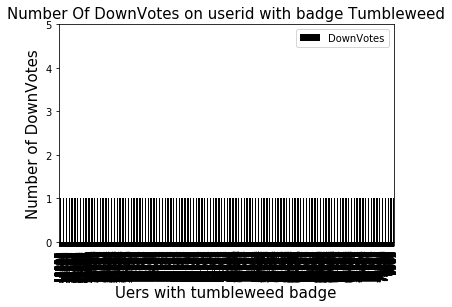

In [27]:
ch4 = pd.pivot_table(df_f, index='UserId', values='UpVotes', aggfunc='count', dropna=True)
ch4.plot(kind="bar", color=tuple(["black"]))
plt.ylim(0, 5)
plt.title('Number Of UpVotes on userid with badge Tumbleweed' ,fontsize = 15)
plt.ylabel('Number of UpVotes', fontsize = 15)
plt.xlabel('Uers with tumbleweed badge', fontsize = 15)

ch4 = pd.pivot_table(df_f, index='UserId', values='DownVotes', aggfunc='count', dropna=True)
ch4.plot(kind="bar", color=tuple(["black"]))
plt.ylim(0, 5)
plt.title('Number Of DownVotes on userid with badge Tumbleweed' ,fontsize = 15)
plt.ylabel('Number of DownVotes', fontsize = 15)
plt.xlabel('Uers with tumbleweed badge', fontsize = 15)

#Reputation

In [20]:
cols = ["Id","PostId","Vote","VoteTypeId","CreationDate","UserId","BountyAmount"]
df_votes = parse_Xml("Votes.xml",cols)

<Element 'votes' at 0x000001C5A0D3CDB8>


In [21]:
df_votes.to_sql("Votes",engine,if_exists="append")

In [22]:
cols = ["Id","TagName","Count","ExcerptPostId","WikiPostId"]
df_tags = parse_Xml("Tags.xml",cols)
df_tags.to_sql("Tags",engine,if_exists="append")

<Element 'tags' at 0x000001C5A0CC4548>


In [23]:
cols = ["Id","PostId","Score","Text","CreationDate","UserId","UserDisplayName"]
df_comments = parse_Xml("Comments.xml",cols)
df_comments.to_sql("Comments",engine,if_exists="append")

<Element 'comments' at 0x000001C5AE3608B8>


Text(0.5, 1.0, 'Class to which the UserIds with badge name Tumbleweed belong to')

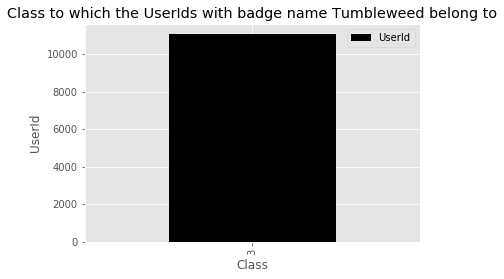

In [23]:
ch7 = pd.pivot_table(df_, index='Class', values='UserId',aggfunc='count', dropna=True)
ch7.plot(kind="bar", color=tuple(["black"]))
plt.ylabel("UserId")
plt.title('Class to which the UserIds with badge name Tumbleweed belong to')

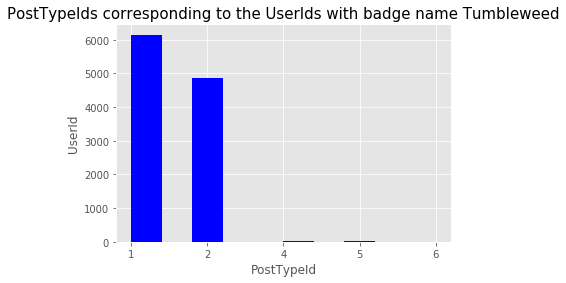

In [72]:
plt.hist(df_['PostTypeId'], color=['Blue'])
plt.xlabel("PostTypeId")
plt.ylabel("UserId")

plt.xticks(range(0, 5))

plt.title('PostTypeIds corresponding to the UserIds with badge name Tumbleweed', fontsize = 15)
plt.show()

Text(0, 0.5, 'UserId')

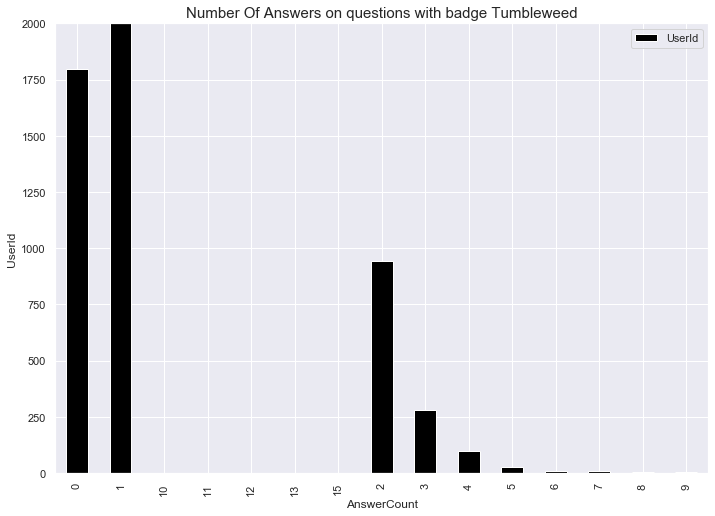

In [74]:
ch7 = pd.pivot_table(df_, index='AnswerCount', values='UserId', aggfunc='count', dropna=True)
ch7.plot(kind="bar", color=tuple(["black"]))
plt.ylim(0, 2000)
plt.title('Number Of Answers on questions with badge Tumbleweed' ,fontsize = 15)
plt.ylabel('UserId')

In [22]:
from shapely.geometry import Polygon
import seaborn as sns
from descartes.patch import PolygonPatch
plt.style.use('ggplot')
%matplotlib inline
import geopandas as gp
from pandas import Series,DataFrame

In [23]:
df_posts['CreationDate']=pd.to_datetime(df_posts['CreationDate'])
df_posts['CraetionDate'] = df_posts['CreationDate'].dt.date

In [60]:
#most viewed questions
dt = pd.read_sql_query('select id,title, viewcount from posts order by viewcount desc limit 20', conn)

In [61]:
dt.drop_duplicates()

,Id,Title,ViewCount
0,20521,Sliding window time series data with Python Pa...,9998
8,17987,How should the bias be initialized and regular...,9991
16,5401,Which book is the best for introduction to ana...,999
17,12553,Beginner in programming and data science with ...,999
18,13385,News Classification,999


In [62]:
#most voted questions
dl = pd.read_sql_query('select id, title, score from posts where posttypeid = 1 order by score desc', conn)
dl.drop_duplicates()

,Id,Title,Score
0,14581,When to use GRU over LSTM?,95
8,31,Clustering customer data stored in ElasticSearch,9
9,77,Is this Neo4j comparison to RDBMS execution ti...,9
10,209,How should one deal with implicit data in reco...,9
11,211,Human activity recognition using smartphone da...,9
...,...,...,...
145593,58117,Decision tree in Google Earth Engine,-1
145594,58153,ValueError: Found input variables with inconsi...,-1
145595,58194,Can anyone point me to a good Phishing Email D...,-1
145596,58275,"How to interpret ""Training Data instances are ...",-1


In [63]:
#most voted answers
do = pd.read_sql_query('select id, score from posts where posttypeid = 2 order by score desc', conn)
do.drop_duplicates()

,Id,Score
0,9408,98
8,339,90
16,51,9
17,112,9
18,135,9
...,...,...
166036,57986,-1
166037,58045,-1
166038,58091,-1
166039,58099,-1


In [32]:
import geopandas as gp

In [ ]:
file_gp = gp.read_file('gadm36.shp')

In [ ]:
file_gp.plot()

In [28]:
df_f.head()

,Id_x,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl,Id_y,UserId,Name,Date,Class,TagBased,_merge
25,26,2342,2014-05-13T23:41:54.430,Alex I,2019-07-11T21:30:37.137,None,None,None,98,55,3,2048845,https://i.stack.imgur.com/S6fiE.png?s=128&g=1,66275,26,Tumbleweed,2018-12-12T07:25:14.267,3,False,both
74,77,86,2014-05-14T02:31:42.773,Srikar Appalaraju,2019-08-03T07:47:59.160,http://srikar.wordpress.com,None,"<p>Hi I am Srikar, I think I have been program...",13,53,0,49383,https://i.stack.imgur.com/wY0k3.jpg,26601,77,Tumbleweed,2017-01-21T16:21:42.533,3,False,both
79,82,464,2014-05-14T03:16:48.710,Damian Melniczuk,2019-08-16T10:20:16.143,http://data.melniczuk.eu/,"Wroclaw, Poland","<p>Physics student, Ubuntu user, games fan.</p>\n",16,135,0,514829,None,10179,82,Tumbleweed,2015-06-05T10:26:43.857,3,False,both
81,84,2697,2014-05-14T03:30:28.107,Rubens,2019-07-25T06:29:39.287,http://dcc.ufmg.br/~rubens,Minas Gerais,<p>#SOreadytohelp</p>\n\n<p>I'm a computer sci...,230,373,2,1822136,None,1175,84,Tumbleweed,2014-06-22T00:30:35.860,3,False,both
93,97,2718,2014-05-14T05:32:45.010,IharS,2019-08-26T07:20:28.960,https://www.linkedin.com/in/shyroki,"Minsk, Belarus","<p>Data analytics team lead, currently working...",174,309,12,241216,https://www.gravatar.com/avatar/68acdc33e278ab...,5274,97,Tumbleweed,2014-11-25T10:08:56.280,3,False,both


Text(0.5, 0, 'Uers with tumbleweed badge')

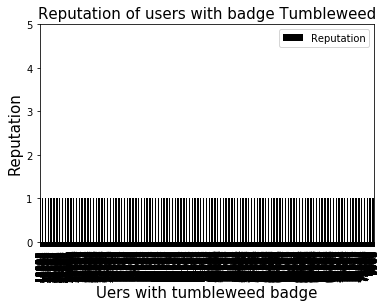

In [31]:
ch9 = pd.pivot_table(df_f, index='UserId', values='Reputation', aggfunc='count', dropna=True)
ch9.plot(kind="bar", color=tuple(["black"]))
plt.ylim(0, 5)
plt.title('Reputation of users with badge Tumbleweed' ,fontsize = 15)
plt.ylabel('Reputation', fontsize = 15)
plt.xlabel('Uers with tumbleweed badge', fontsize = 15)


In [ ]:
dh = pdx = df_users.sort_values('Reputation',ascending=False)

In [ ]:
`